In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
titanic_df = sns.load_dataset('titanic')

In [3]:
titanic_df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
missing_values = titanic_df.isnull().sum()
missing_values_percentage = (missing_values / len(titanic_df)) * 100
missing_values_percentage

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [5]:
missing_values_info = pd.concat(
    [missing_values, missing_values_percentage],
    keys=['Missing Count', 'Missing Percentage'],
    axis=1)

missing_values_info

,Missing Count,Missing Percentage
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
age,177,19.865320
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000
embarked,2,0.224467
class,0,0.000000
who,0,0.000000


In [6]:
import missingno as msno
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Matrix Plot of Missing Values')

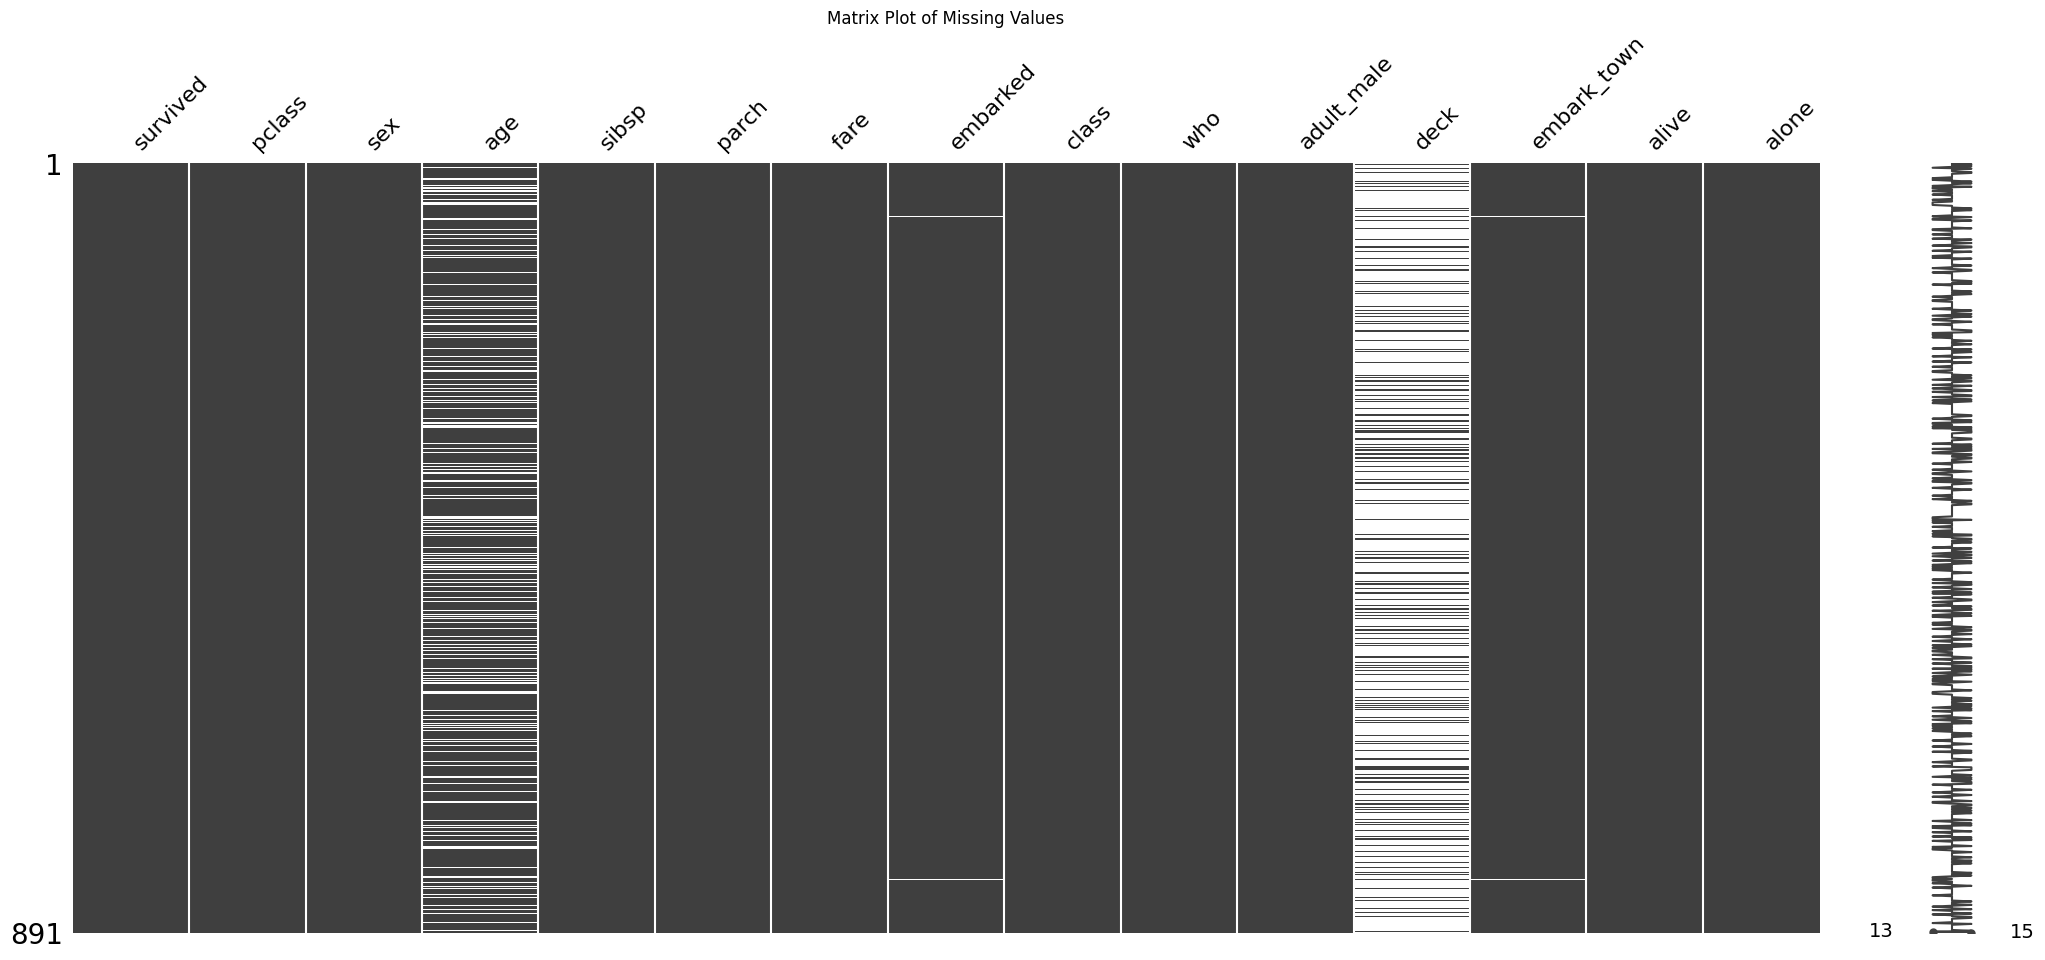

In [7]:
msno.matrix(titanic_df)
plt.title('Matrix Plot of Missing Values')

In [8]:
suspicious_values = ['N/A', 'None', '-999', '', ' ', 'Unknown']
for column in titanic_df.columns:
    if titanic_df[column].dtype == 'object':
        value_counts = titanic_df[column].value_counts()
        for value in suspicious_values:
            if value in value_counts:
                print(
                    f'Column {column} contains {value_counts[value]} instances of {value}.'
                )

In [9]:
sample_df = pd.DataFrame({
    'Name': ['Alice Smith', 'Bob Johnson', 'Charlie Lee', 'David Brown', 'Eva White', 'Frank Black', 'Grace Green'],
    'Age': [28, 34, '-999', 42, '-999', 36, 30],
    'City': ['New York', 'Unknown', 'Chicago', 'Houston', 'Unknown', 'Philadelphia', 'San Antonio'],
    'Salary': [70000, 80000, 65000, 120000, 50000, 90000, 75000]
    },
    index=np.arange(1, 8))
sample_df

,Name,Age,City,Salary
1,Alice Smith,28,New York,70000
2,Bob Johnson,34,Unknown,80000
3,Charlie Lee,-999,Chicago,65000
4,David Brown,42,Houston,120000
5,Eva White,-999,Unknown,50000
6,Frank Black,36,Philadelphia,90000
7,Grace Green,30,San Antonio,75000


In [10]:
suspicious_values = ['N/A', 'None', '-999', '', ' ', 'Unknown']
for column in sample_df.columns:
    if sample_df[column].dtype == 'object':
        value_counts = sample_df[column].value_counts()
        for value in suspicious_values:
            if value in value_counts:
                print(
                    f'Column {column} contains {value_counts[value]} instances of {value}.'
                )

Column Age contains 2 instances of -999.
Column City contains 2 instances of Unknown.


In [11]:
for suspicious_value in suspicious_values:
    for column in sample_df.columns:
        sample_df[column] = sample_df[column].where(sample_df[column] != suspicious_value, np.nan)

sample_df

,Name,Age,City,Salary
1,Alice Smith,28,New York,70000
2,Bob Johnson,34,NaN,80000
3,Charlie Lee,NaN,Chicago,65000
4,David Brown,42,Houston,120000
5,Eva White,NaN,NaN,50000
6,Frank Black,36,Philadelphia,90000
7,Grace Green,30,San Antonio,75000


In [12]:
sample_df = pd.DataFrame({
    'Name': ['Alice Smith', 'Bob Johnson', 'Charlie Lee', 'David Brown', 'Eva White', 'Frank Black', 'Grace Green'],
    'Age': [28, 34, '-999', 42, '', 36, 30],
    'City': ['New York', 'Unknown', 'Chicago', 'Houston', 'Unknown', 'Philadelphia', 'San Antonio'],
    'Salary': [70000, 80000, 65000, 120000, 50000, 90000, 75000]
    },
    index=np.arange(1, 8))
sample_df

,Name,Age,City,Salary
1,Alice Smith,28,New York,70000
2,Bob Johnson,34,Unknown,80000
3,Charlie Lee,-999,Chicago,65000
4,David Brown,42,Houston,120000
5,Eva White,,Unknown,50000
6,Frank Black,36,Philadelphia,90000
7,Grace Green,30,San Antonio,75000


In [13]:
suspicious_values = ['N/A', 'None', '-999', '', ' ', 'Unknown']
for column in sample_df.columns:
    if sample_df[column].dtype == 'object':
        value_counts = sample_df[column].value_counts()
        for value in suspicious_values:
            if value in value_counts:
                print(
                    f'Column {column} contains {value_counts[value]} instances of {value}.'
                )

Column Age contains 1 instances of -999.
Column Age contains 1 instances of .
Column City contains 2 instances of Unknown.


In [14]:
for suspicious_value in suspicious_values:
    for column in sample_df.columns:
        sample_df[column] = sample_df[column].where(sample_df[column] != suspicious_value, np.nan)

sample_df

,Name,Age,City,Salary
1,Alice Smith,28,New York,70000
2,Bob Johnson,34,NaN,80000
3,Charlie Lee,NaN,Chicago,65000
4,David Brown,42,Houston,120000
5,Eva White,NaN,NaN,50000
6,Frank Black,36,Philadelphia,90000
7,Grace Green,30,San Antonio,75000


In [15]:
sample_df = sample_df = pd.DataFrame({
    'Name': ['Alice Smith', 'Bob Johnson', 'Charlie Lee', 'David Brown', 'Eva White', 'Frank Black', 'Grace Green'],
    'Age': [28, 34, '-999', 42, '', 36, 30],
    'City': ['New York', 'Unknown', 'Chicago', 'Houston', 'Unknown', 'Philadelphia', 'San Antonio'],
    'Salary': [70000, 80000, 65000, 120000, 50000, 90000, 75000]
    },
    index=np.arange(1, 8))
sample_df

,Name,Age,City,Salary
1,Alice Smith,28,New York,70000
2,Bob Johnson,34,Unknown,80000
3,Charlie Lee,-999,Chicago,65000
4,David Brown,42,Houston,120000
5,Eva White,,Unknown,50000
6,Frank Black,36,Philadelphia,90000
7,Grace Green,30,San Antonio,75000


In [16]:
def suspicious_values_detector(df, suspicious_values, inplace_replace=False):
    results = []
    for column in df.columns:
        value_counts = df[column].value_counts()
        for value in suspicious_values:
            if value in value_counts.index:
                count = value_counts.loc[value]
                results.append(
                    f'Column {column} contains {count} instances of {value}.'
                )
    if inplace_replace == True:
        for column in df.columns:
            for suspicious_value in suspicious_values:
                df[column] = df[column].where(df[column] != suspicious_value, np.nan)
        return df
    
    return results

In [17]:
suspicious_values_detector(
    df=sample_df,
    suspicious_values=['N/A', 'None', '-999', '', ' ', 'Unknown']
)

['Column Age contains 1 instances of -999.',
 'Column Age contains 1 instances of .',
 'Column City contains 2 instances of Unknown.']

In [18]:
suspicious_values_detector(
    df=sample_df,
    suspicious_values=['N/A', 'None', '-999', '', ' ', 'Unknown'],
    inplace_replace=True
)

,Name,Age,City,Salary
1,Alice Smith,28,New York,70000
2,Bob Johnson,34,NaN,80000
3,Charlie Lee,NaN,Chicago,65000
4,David Brown,42,Houston,120000
5,Eva White,NaN,NaN,50000
6,Frank Black,36,Philadelphia,90000
7,Grace Green,30,San Antonio,75000


In [19]:
titanic_df.loc[0, 'age'] = '-999'
suspicious_values_detector(
    df=titanic_df,
    suspicious_values=['N/A', 'None', '-999', '', ' ', 'Unknown']
)

/tmp/ipykernel_4064/448931900.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-999' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  titanic_df.loc[0, 'age'] = '-999'


['Column age contains 1 instances of -999.']